# Prospeção de Dados 2021/2022
## Third Home Assignment - Clustering 
### Group 4
Students
- Catarina Canastra, nº57766
- Daniel Dias, nº59056
- João Raimundo, nº57454

### 0.1. Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, calinski_harabasz_score
from scipy.spatial.distance import pdist, squareform
from kneed import KneeLocator
from sklearn.decomposition import PCA

### 0.2. Import Data

In [4]:
data = pd.read_csv("jena_climate_2009_2016.csv", sep=",", index_col="Date Time", parse_dates=[0])

In [ ]:
data.head(5)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
data.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


In [ ]:
print(data.shape)

(420551, 14)


### 0.3. Data Pre-processing

#### Split Data - Midnight (00:00:00) / Noon (12:00:00)

**Midnight (00:00:00)**

In [5]:
midnight_dt = data.at_time('00:00:00')
midnight_dt.head(5)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-02-01,999.59,-4.54,268.65,-5.46,93.2,4.36,4.06,0.30,2.53,4.06,1294.33,0.41,0.88,155.00
2009-03-01,1002.32,-4.71,268.27,-6.09,90.0,4.30,3.87,0.43,2.41,3.86,1298.79,1.42,1.88,16.85
2009-04-01,992.93,-1.90,271.81,-6.39,71.2,5.31,3.78,1.53,2.37,3.81,1273.31,1.47,2.50,147.60
2009-05-01,985.07,-1.47,272.86,-2.45,93.0,5.48,5.10,0.38,3.23,5.18,1260.58,1.42,3.00,239.80
2009-06-01,997.60,-12.63,260.71,-15.07,81.8,2.31,1.89,0.42,1.18,1.89,1332.96,1.60,2.63,355.50


In [ ]:
midnight_dt.shape

(2920, 14)

**Noon (12:00:00)**

In [6]:
noon_dt = data.at_time('12:00:00')
noon_dt.head(5)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 12:00:00,1000.30,-6.87,266.27,-8.28,89.6,3.64,3.27,0.38,2.03,3.26,1306.98,1.84,2.63,184.40
2009-02-01 12:00:00,998.91,-3.12,270.13,-4.50,90.1,4.85,4.37,0.48,2.73,4.38,1286.47,1.54,2.00,127.00
2009-03-01 12:00:00,999.02,-5.96,267.28,-8.72,80.7,3.91,3.16,0.75,1.97,3.16,1300.90,1.31,1.88,213.90
2009-04-01 12:00:00,988.94,-1.21,272.82,-2.36,91.8,5.59,5.13,0.46,3.23,5.19,1264.30,1.99,3.88,225.80
2009-05-01 12:00:00,990.42,-3.65,270.26,-5.54,86.6,4.66,4.04,0.62,2.54,4.08,1278.21,5.49,8.38,17.44


In [ ]:
noon_dt.shape

(2921, 14)

**Concatenate Midnight and Noon Dataframes**

In [7]:
midnight_noon_dt = pd.concat([midnight_dt, noon_dt])
midnight_noon_dt.head(5)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-02-01,999.59,-4.54,268.65,-5.46,93.2,4.36,4.06,0.30,2.53,4.06,1294.33,0.41,0.88,155.00
2009-03-01,1002.32,-4.71,268.27,-6.09,90.0,4.30,3.87,0.43,2.41,3.86,1298.79,1.42,1.88,16.85
2009-04-01,992.93,-1.90,271.81,-6.39,71.2,5.31,3.78,1.53,2.37,3.81,1273.31,1.47,2.50,147.60
2009-05-01,985.07,-1.47,272.86,-2.45,93.0,5.48,5.10,0.38,3.23,5.18,1260.58,1.42,3.00,239.80
2009-06-01,997.60,-12.63,260.71,-15.07,81.8,2.31,1.89,0.42,1.18,1.89,1332.96,1.60,2.63,355.50


In [ ]:
midnight_noon_dt.shape

(5841, 14)

#### Scaling and Standardize Data

**Scaling**

In [8]:
scaler_mm = MinMaxScaler()
data_mm = scaler_mm.fit_transform(data) # scale all data
midnight_mm = scaler_mm.fit_transform(midnight_dt)  # scale midnight dataframe
noon_mm = scaler_mm.fit_transform(noon_dt)  # scale noon dataframe
midnight_noon_mm = scaler_mm.fit_transform(midnight_noon_dt)  # scale midnight_noon dataframe

**Standardize**

In [9]:
scaler_ss = StandardScaler()
data_ss = scaler_ss.fit_transform(data_mm)         # data array standardization
midnight_ss = scaler_ss.fit_transform(midnight_mm)  # midnight array standardization
noon_ss = scaler_ss.fit_transform(noon_mm)  # noon array standardization
midnight_noon_ss = scaler_ss.fit_transform(midnight_noon_mm)  # midnight_noon array standardization

# tranform into dataframe
data_standard = pd.DataFrame(data=data_ss)
midnight_standard = pd.DataFrame(data=midnight_ss)
noon_standard = pd.DataFrame(data=noon_ss)
midnight_noon_standard = pd.DataFrame(data=midnight_noon_ss)

### Inspect the Transformed Data

**All Data**

In [ ]:
data_standard.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,4.205510e+05,4.205510e+05,4.205510e+05,4.205510e+05,4.205510e+05,4.205510e+05,4.205510e+05,4.205510e+05,4.205510e+05,4.205510e+05,4.205510e+05,4.205510e+05,4.205510e+05,4.205510e+05
mean,1.663486e-15,-2.849444e-15,-2.886231e-15,-1.484204e-15,1.212873e-15,9.838012e-16,2.775696e-15,-1.161545e-15,-6.341153e-15,5.952122e-16,1.255766e-15,2.524471e-14,3.799221e-14,-6.439011e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-9.046245e+00,-3.853589e+00,-3.867705e+00,-4.452138e+00,-3.827243e+00,-1.631507e+00,-2.089728e+00,-8.255135e-01,-2.079114e+00,-2.087228e+00,-3.917752e+00,-1.528070e+02,-1.449220e+02,-2.015927e+00
25%,-5.997241e-01,-7.230073e-01,-7.128898e-01,-7.006519e-01,-6.553871e-01,-7.489653e-01,-7.943665e-01,-6.478481e-01,-7.915289e-01,-7.910070e-01,-7.147626e-01,-1.088251e-02,-1.878607e-02,-5.750210e-01
50%,4.393434e-02,-3.579020e-03,-2.674296e-03,3.924517e-02,1.997881e-01,-2.269348e-01,-1.610254e-01,-3.782867e-01,-1.627960e-01,-1.606046e-01,-5.685400e-02,8.827979e-04,-1.399010e-03,2.694489e-01
75%,6.588794e-01,7.146621e-01,7.098929e-01,7.598276e-01,8.127952e-01,5.199307e-01,6.730729e-01,2.568161e-01,6.692398e-01,6.728488e-01,6.680962e-01,1.769038e-02,2.439179e-02,6.847620e-01
max,3.127034e+00,3.303892e+00,3.274429e+00,2.697229e+00,1.456149e+00,6.485809e+00,4.489849e+00,8.570332e+00,4.558348e+00,4.528456e+00,4.439688e+00,4.093072e-01,2.962095e-01,2.137204e+00


**Noon**

In [ ]:
noon_standard.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03
mean,-2.555679e-16,2.356516e-16,-1.676927e-16,-2.690229e-16,-2.419040e-16,5.754460e-17,1.603191e-16,1.584567e-16,1.804635e-16,-1.616114e-16,2.658302e-16,8.088227e-16,-3.728666e-15,2.492776e-16
std,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00
min,-4.915930e+00,-3.189113e+00,-3.198481e+00,-3.600519e+00,-2.855751e+00,-1.591887e+00,-1.981581e+00,-1.063758e+00,-1.974812e+00,-1.978463e+00,-2.374676e+00,-5.403462e+01,-5.403188e+01,-1.909458e+00
25%,-5.914752e-01,-7.363670e-01,-7.283617e-01,-6.857810e-01,-7.784728e-01,-7.869344e-01,-7.816314e-01,-7.725293e-01,-7.857901e-01,-7.857047e-01,-7.414416e-01,1.158403e-02,8.106453e-03,-9.569117e-01
50%,5.368164e-02,3.407577e-02,2.199745e-02,4.328015e-02,-8.799387e-03,-2.042698e-01,-1.530862e-01,-3.218178e-01,-1.481441e-01,-1.481554e-01,-7.819166e-02,1.661000e-02,1.631886e-02,2.161521e-01
75%,6.583674e-01,7.626590e-01,7.521374e-01,7.437211e-01,7.728814e-01,6.051737e-01,6.540231e-01,5.119984e-01,6.582904e-01,6.587797e-01,6.912075e-01,2.352746e-02,2.588198e-02,6.890150e-01
max,3.016404e+00,2.684806e+00,2.679707e+00,2.453400e+00,1.961613e+00,4.688316e+00,3.820558e+00,6.132024e+00,3.861524e+00,3.841821e+00,3.725613e+00,6.773433e-02,9.255372e-02,2.180352e+00


**Midnight and Noon**

In [ ]:
midnight_noon_standard.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,5.841000e+03,5.841000e+03,5.841000e+03,5.841000e+03,5.841000e+03,5.841000e+03,5.841000e+03,5.841000e+03,5.841000e+03,5.841000e+03,5.841000e+03,5.841000e+03,5.841000e+03,5.841000e+03
mean,-1.224077e-16,2.190414e-16,-3.293224e-16,-7.365373e-16,-5.175529e-16,-6.047019e-16,-3.866488e-16,-3.628515e-17,3.257871e-17,-4.045158e-16,-3.942138e-17,-1.262178e-16,4.462085e-15,-1.492842e-16
std,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00
min,-4.944522e+00,-3.706323e+00,-3.729038e+00,-4.204700e+00,-3.431259e+00,-1.652972e+00,-2.072369e+00,-8.878649e-01,-2.066101e+00,-2.072735e+00,-2.670968e+00,-7.641374e+01,-7.640575e+01,-2.063405e+00
25%,-5.945187e-01,-7.248252e-01,-7.168036e-01,-7.078306e-01,-7.009745e-01,-7.600097e-01,-7.990676e-01,-6.761826e-01,-7.965500e-01,-7.955283e-01,-7.243956e-01,3.761278e-03,-1.548452e-03,-5.656251e-01
50%,5.253983e-02,1.574811e-02,1.246165e-02,4.395901e-02,1.596113e-01,-2.080913e-01,-1.540243e-01,-3.659947e-01,-1.542175e-01,-1.510011e-01,-6.227705e-02,9.951046e-03,8.841563e-03,2.776821e-01
75%,6.541488e-01,7.191127e-01,7.155543e-01,7.508209e-01,8.273610e-01,5.377796e-01,6.636701e-01,3.172570e-01,6.619226e-01,6.617666e-01,6.479863e-01,1.896824e-02,2.320423e-02,6.565253e-01
max,3.079721e+00,3.076464e+00,3.065145e+00,2.468555e+00,1.576239e+00,5.698998e+00,3.876897e+00,7.812067e+00,3.918926e+00,3.898620e+00,4.225403e+00,8.759060e-02,1.264168e-01,2.156650e+00


### 0.4. Functions Definition

In [10]:
def avgDist(X, labels):
    D = pdist(X, metric='euclidean')
    dmatrix = squareform(D, checks=True)
    N = len(labels)
    L = list(set(labels))
    L.sort()
    result = 0
    for i in L:
        Nc = sum(labels == i)
        S = 0
        if Nc > 1: S = np.sum(dmatrix[labels == i, :][:, labels == i]) / (Nc * (Nc - 1))
        result += S * Nc / N
    return result

In [11]:
def elbow_knee(data, model, K):
    # Instantiate the clustering model and visualizer
    visualizer = KElbowVisualizer(model, metric='calinski_harabasz', k=(2, K))

    visualizer.fit(data)        # Fit the data to the visualizer
    visualizer.show()

In [12]:
def cluster_analysis_kmeans(X, K):
    results_kmeans = []
    clusters = list(range(2,K))  # list with number of clusters
    
    for k in clusters:

        kms = KMeans(n_clusters=k, random_state=0).fit(X)
        kms_sscore = silhouette_score(X, kms.labels_)
        kms_cscore = calinski_harabasz_score(X, kms.labels_)
        result_kms = {'Number of Clusters': k, 'Algorithm': 'Kmeans', 'Hyperparameters': '-',
                      'Silhouette Score': kms_sscore, 'Calinski Harabasz Score': kms_cscore}
        results_kmeans.append(result_kms)


    cluster_results_kmeans = pd.DataFrame(data=results_kmeans)

    return cluster_results_kmeans

In [13]:
def cluster_analysis_hac(X, K):
    results_hac = []
    clusters = list(range(2,K))  # list with number of clusters
    linkage = ['ward', 'complete', 'average', 'single']  # inkage criterion to use

    for k in clusters:
        for l in linkage:
            hac = AgglomerativeClustering(linkage=l, n_clusters=k).fit(X)
            hac_sscore = silhouette_score(X, hac.labels_)
            hac_cscore = calinski_harabasz_score(X, hac.labels_)
            result_hac = {'Number of Clusters': k, 'Algorithm': 'Agglomerative Clustering',
                          'Hyperparameters': "linkage: " + l, 'Silhouette Score': hac_sscore,
                          'Calinski Harabasz Score': hac_cscore}
            results_hac.append(result_hac)


    cluster_results_hac = pd.DataFrame(data=results_hac)

    return cluster_results_hac

In [14]:
def cluster_analysis_dbs(X):
    results_dbs = []

    for eps in np.arange(0.1, 3, 0.5):
        for Nmin in range(3, 10):
            dbs = DBSCAN(eps=eps, min_samples=Nmin).fit(X)
            # We take into account the 'noise' cluster (in DBSCAN it's the first cluster created with id -1),
            # and we are only interested in results with more than 1 'real' cluster
            unique_labels = len(np.unique(list(filter(lambda x: x>-1, dbs.labels_))))
            # We want the cases where 2 or more 'real' clusters were found
            if unique_labels > 1:
                dbs_cscore = calinski_harabasz_score(X, dbs.labels_)
                dbs_sscore = silhouette_score(X, dbs.labels_ + 1)
                result_dbs = {'Number of Clusters': unique_labels, 'Algorithm': 'DBSCAN',
                              'Hyperparameters': f'eps={eps}, min_samples={Nmin}', 'Silhouette Score': dbs_sscore,
                              'Calinski Harabasz Score': dbs_cscore}
                results_dbs.append(result_dbs)

    cluster_results_dbs = pd.DataFrame(data=results_dbs)

    return cluster_results_dbs

In [15]:
def drawSillouette(X, labels, header="" ):
    y_lower =10
    clusters=list(set(labels))
    n_clusters=len(clusters)

    plt.figure(figsize=(12,8))
    ax1 = plt.gca()
    ax1.set_xlim([-0.5, 1])
    ax1.set_ylim([0, len(X) + (n_clusters) * 3+ y_lower])
    sil_avg = silhouette_score(X, labels)
    silhouette_values = silhouette_samples(X, labels)
    for i,c in enumerate(clusters):
        cs_values = silhouette_values[labels == c]
        cs_values.sort()
        size_ci = cs_values.shape[0]
        y_upper = y_lower + size_ci
        color = cm.nipy_spectral(i / n_clusters) #np.array(["r", "g", "b", "k", "y"])[i] #
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cs_values, facecolor=color, edgecolor="k", alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_ci, str(c))
        y_lower = y_upper + 3  # 10 for the 0 samples
    ax1.set_title("Silhouette plot "+ header)
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Clusters")
    ax1.axvline(x=sil_avg, c="r", linestyle="--")

    ax1.set_yticks([]) 
    plt.show()

#### 0.5. PCA Plot Pre-Processment

In [16]:
pca = PCA(n_components=2)

# noon
pca_noon = pd.DataFrame(pca.fit_transform(noon_standard))
pca_noon.columns = ["PC1", "PC2"]
pca_noon = pca_noon.drop(index=2387) # drop outlier

# midnight and noon
pca_midnight_noon = pd.DataFrame(pca.fit_transform(midnight_noon_standard))
pca_midnight_noon.columns = ["PC1", "PC2"]
pca_midnight_noon = pca_midnight_noon.drop(index=5307) # drop outlier

# all data
pca_all_data = pd.DataFrame(pca.fit_transform(data_standard))
pca_all_data.columns = ["PC1", "PC2"]
pca_all_data = pca_all_data.drop(index=[343577,343578,343579,343580,343581,343582,343583,343584,343585,343586,343587,	
                                343588,343589,343590,343591,343592,343593,343594,343595,343596]) # drop outlier

## Objective 1 - Cluster the Data at Noon and Midnight

### 1.1. Rows collected at Noon

#### 1.1.1. The Elbow Method

**Kmeans**

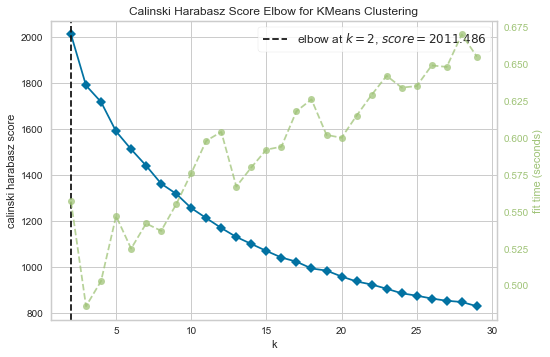

In [18]:
elbow_knee(noon_standard, KMeans(), 30)

**HAC**

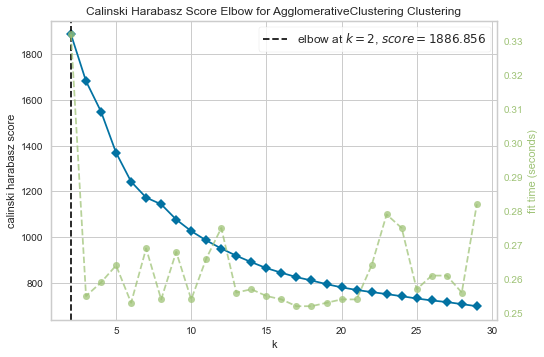

In [19]:
elbow_knee(noon_standard, AgglomerativeClustering(), 30)

#### 1.1.2. Finding the best algorithms for clustering

**Kmeans**

In [20]:
noon_cluster_kmeans = cluster_analysis_kmeans(noon_standard, 30)
noon_cluster_kmeans.sort_values(['Calinski Harabasz Score'],ascending=False).head(10)

,Number of Clusters,Algorithm,Hyperparameters,Silhouette Score,Calinski Harabasz Score
0,2,Kmeans,-,0.386097,2011.485737
1,3,Kmeans,-,0.387408,1789.628590
2,4,Kmeans,-,0.265484,1717.946236
3,5,Kmeans,-,0.224827,1590.248431
4,6,Kmeans,-,0.229067,1512.479996
5,7,Kmeans,-,0.223366,1440.471209
6,8,Kmeans,-,0.216632,1363.046204
7,9,Kmeans,-,0.215824,1319.182756
8,10,Kmeans,-,0.218115,1259.058372
9,11,Kmeans,-,0.221629,1213.615421


**HAC**

In [21]:
noon_cluster_hac = cluster_analysis_hac(noon_standard, 30)
noon_cluster_hac.sort_values(['Calinski Harabasz Score'],ascending=False).head(10)

,Number of Clusters,Algorithm,Hyperparameters,Silhouette Score,Calinski Harabasz Score
0,2,Agglomerative Clustering,linkage: ward,0.365774,1886.856320
4,3,Agglomerative Clustering,linkage: ward,0.368076,1682.329345
5,3,Agglomerative Clustering,linkage: complete,0.350081,1591.848295
8,4,Agglomerative Clustering,linkage: ward,0.291930,1548.957883
12,5,Agglomerative Clustering,linkage: ward,0.215359,1369.211779
9,4,Agglomerative Clustering,linkage: complete,0.282618,1284.843908
16,6,Agglomerative Clustering,linkage: ward,0.188190,1242.668526
20,7,Agglomerative Clustering,linkage: ward,0.175636,1173.134154
24,8,Agglomerative Clustering,linkage: ward,0.158925,1143.878056
13,5,Agglomerative Clustering,linkage: complete,0.189286,1097.726175


**DBSCAN**

In [527]:
noon_cluster_dbs = cluster_analysis_dbs(noon_standard)
noon_cluster_dbs.sort_values(['Calinski Harabasz Score'],ascending=False).head(10)

,Number of Clusters,Algorithm,Hyperparameters,Silhouette Score,Calinski Harabasz Score
13,2,DBSCAN,"eps=1.1, min_samples=9",0.306492,30.900368
12,2,DBSCAN,"eps=1.1, min_samples=8",0.317097,30.178285
8,2,DBSCAN,"eps=1.1, min_samples=4",0.349467,28.988698
11,2,DBSCAN,"eps=1.1, min_samples=7",0.327630,28.518670
9,2,DBSCAN,"eps=1.1, min_samples=5",0.344013,28.021653
10,2,DBSCAN,"eps=1.1, min_samples=6",0.336434,27.788122
7,3,DBSCAN,"eps=1.1, min_samples=3",0.205185,23.743511
6,16,DBSCAN,"eps=0.6, min_samples=9",-0.407716,20.342466
2,28,DBSCAN,"eps=0.6, min_samples=5",-0.414866,20.200963
4,24,DBSCAN,"eps=0.6, min_samples=7",-0.415455,19.223010


#### 1.1.3. Clustering the dataset with the chosen algorithms

**Kmeans**

In [517]:
kms_noon = KMeans(n_clusters=2).fit(noon_standard)

In [518]:
nclusts=len(set(kms_noon.labels_))
cluster_elements_count = np.bincount(kms_noon.labels_)
for i in range(nclusts):
    print("Cluster: ", i +1, "-->", cluster_elements_count[i], "data points")

Cluster:  1 --> 1322 data points
Cluster:  2 --> 1599 data points


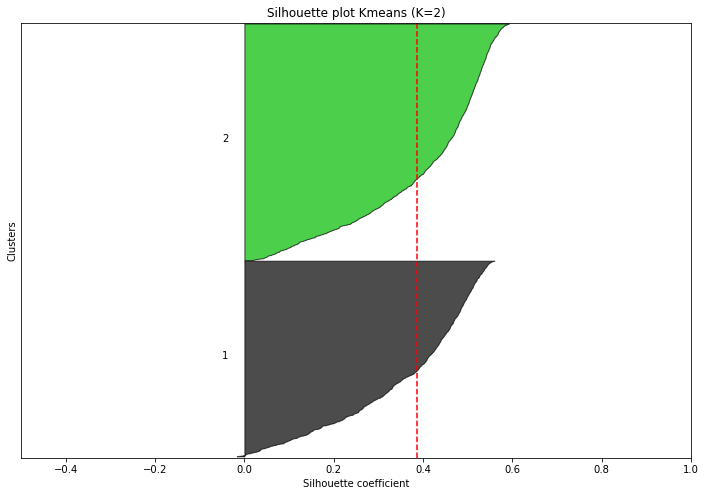

In [519]:
drawSillouette(noon_standard, kms_noon.labels_+1, "Kmeans (K=2)")

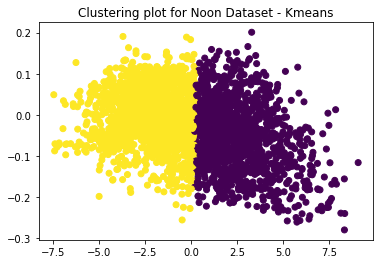

In [520]:
pca_kms_noon = pca_noon.copy(deep=True)
kms_labels_filt = np.delete(kms_noon.labels_, 2387)
pca_kms_noon['cluster'] = kms_labels_filt

plt.scatter(pca_kms_noon["PC1"], pca_kms_noon["PC2"], c=pca_kms_noon['cluster'])
plt.title('Clustering plot for Noon Dataset - Kmeans')
plt.show()

**HAC**

In [521]:
hac_noon = AgglomerativeClustering(linkage="ward", n_clusters=2).fit(noon_standard)


In [522]:
nclusts=len(set(hac_noon.labels_))
cluster_elements_count = np.bincount(hac_noon.labels_)
for i in range(nclusts):
    print("Cluster: ", i +1, "-->", cluster_elements_count[i], "data points")

Cluster:  1 --> 1544 data points
Cluster:  2 --> 1377 data points


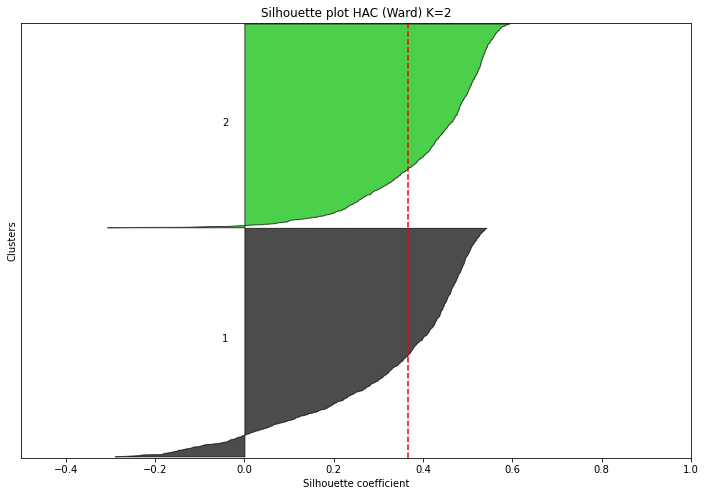

In [523]:
drawSillouette(noon_standard, hac_noon.labels_+1, "HAC (Ward) K=2")

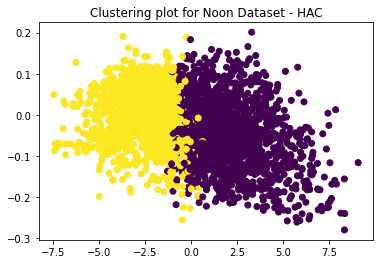

In [524]:
pca_hac_noon = pca_noon.copy(deep=True)
hac_labels_filt = np.delete(hac_noon.labels_, 2387)
pca_hac_noon['cluster'] = hac_labels_filt

plt.scatter(pca_hac_noon["PC1"], pca_hac_noon["PC2"], c=pca_hac_noon['cluster'])
plt.title('Clustering plot for Noon Dataset - HAC')
plt.show()

**DBSCAN**

In [528]:
dbs_noon = DBSCAN(eps=1.1, min_samples=9).fit(noon_standard)

In [529]:
nclusts=len(set(dbs_noon.labels_))
cluster_elements_count = np.bincount(dbs_noon.labels_+1)
for i in range(nclusts):
    print("Cluster: ", i, "-->", cluster_elements_count[i], "data points")    

Cluster:  0 --> 82 data points
Cluster:  1 --> 2830 data points
Cluster:  2 --> 9 data points


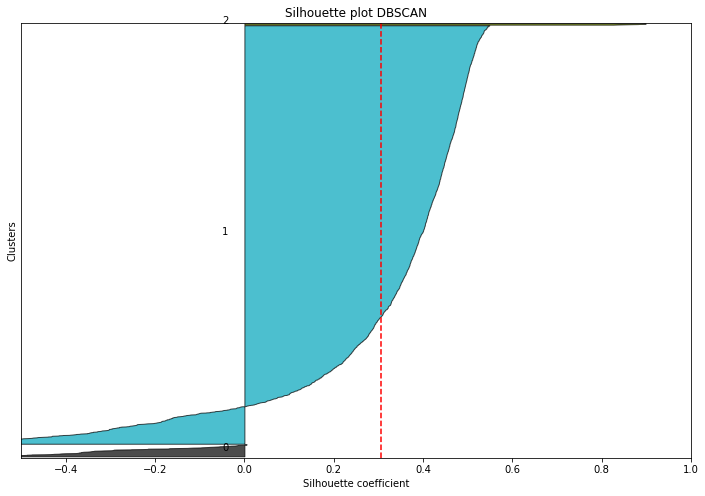

In [530]:
drawSillouette(noon_standard, dbs_noon.labels_+1, "DBSCAN")

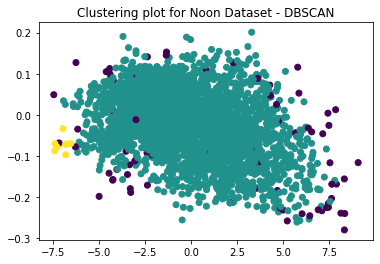

In [531]:
pca_dbs_noon = pca_noon.copy(deep=True)
dbs_labels_filt = np.delete(dbs_noon.labels_, 2387)
pca_dbs_noon['cluster'] = dbs_labels_filt +1

plt.scatter(pca_dbs_noon["PC1"], pca_dbs_noon["PC2"], c=pca_dbs_noon['cluster'])
plt.title('Clustering plot for Noon Dataset - DBSCAN')
plt.show()

### 1.2. Rows collected at  Midnight and Noon

#### 1.2.1. The Elbow Method

**Kmeans**

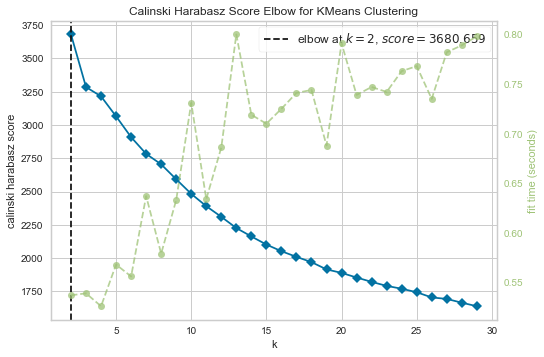

In [22]:
elbow_knee(midnight_noon_standard, KMeans(), 30)

**HAC**

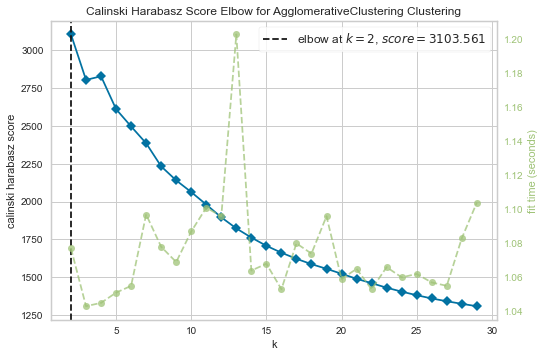

In [23]:
elbow_knee(midnight_noon_standard, AgglomerativeClustering(), 30)

#### 1.2.2. Finding the best algorithms for clustering

**Kmeans**

In [24]:
midnight_noon_cluster_kmeans = cluster_analysis_kmeans(midnight_noon_standard, 30)
midnight_noon_cluster_kmeans.sort_values(['Calinski Harabasz Score'],ascending=False).head(10)

,Number of Clusters,Algorithm,Hyperparameters,Silhouette Score,Calinski Harabasz Score
0,2,Kmeans,-,0.370257,3680.663850
1,3,Kmeans,-,0.371163,3284.908699
2,4,Kmeans,-,0.262824,3215.229363
3,5,Kmeans,-,0.238050,3064.908069
4,6,Kmeans,-,0.234006,2908.382664
5,7,Kmeans,-,0.225997,2782.979897
6,8,Kmeans,-,0.222411,2704.158462
7,9,Kmeans,-,0.222879,2591.889606
8,10,Kmeans,-,0.227435,2482.368726
9,11,Kmeans,-,0.229030,2388.353229


**HAC**

In [25]:
midnight_noon_cluster_hac = cluster_analysis_hac(midnight_noon_standard, 30)
midnight_noon_cluster_hac.sort_values(['Calinski Harabasz Score'],ascending=False)

,Number of Clusters,Algorithm,Hyperparameters,Silhouette Score,Calinski Harabasz Score
0,2,Agglomerative Clustering,linkage: ward,0.359941,3103.560726
5,3,Agglomerative Clustering,linkage: complete,0.352286,3020.496386
8,4,Agglomerative Clustering,linkage: ward,0.204212,2827.086597
4,3,Agglomerative Clustering,linkage: ward,0.358116,2803.185813
12,5,Agglomerative Clustering,linkage: ward,0.199760,2609.875698
...,...,...,...,...,...
95,25,Agglomerative Clustering,linkage: single,-0.155582,46.637196
99,26,Agglomerative Clustering,linkage: single,-0.155250,45.271081
103,27,Agglomerative Clustering,linkage: single,-0.155227,43.825748
107,28,Agglomerative Clustering,linkage: single,-0.155319,42.416478


**DBSCAN**

In [536]:
midnight_noon_cluster_dbs = cluster_analysis_dbs(midnight_noon_standard)
midnight_noon_cluster_dbs.sort_values(['Calinski Harabasz Score'],ascending=False).head(10)

,Number of Clusters,Algorithm,Hyperparameters,Silhouette Score,Calinski Harabasz Score
5,9,DBSCAN,"eps=0.6, min_samples=8",-0.256388,43.858426
8,2,DBSCAN,"eps=1.1, min_samples=4",0.499021,42.333934
10,2,DBSCAN,"eps=1.1, min_samples=6",0.460381,35.908807
6,12,DBSCAN,"eps=0.6, min_samples=9",-0.344628,35.215160
9,3,DBSCAN,"eps=1.1, min_samples=5",0.353819,33.538893
7,3,DBSCAN,"eps=1.1, min_samples=3",0.202155,31.107620
4,21,DBSCAN,"eps=0.6, min_samples=7",-0.405003,25.815731
3,23,DBSCAN,"eps=0.6, min_samples=6",-0.419469,25.004098
2,21,DBSCAN,"eps=0.6, min_samples=5",-0.464000,21.142635
1,32,DBSCAN,"eps=0.6, min_samples=4",-0.472932,16.692317


#### 1.2.3. Clustering the dataset with the chosen algorithms

**Kmeans**

In [35]:
kms_midnight_noon = KMeans(n_clusters=2).fit(midnight_noon_standard)

In [36]:
nclusts=len(set(kms_midnight_noon.labels_))
cluster_elements_count = np.bincount(kms_midnight_noon.labels_)
for i in range(nclusts):
    print("Cluster: ", i +1, "-->", cluster_elements_count[i], "data points")

Cluster:  1 --> 2620 data points
Cluster:  2 --> 3221 data points


<Figure size 1200x800 with 0 Axes>

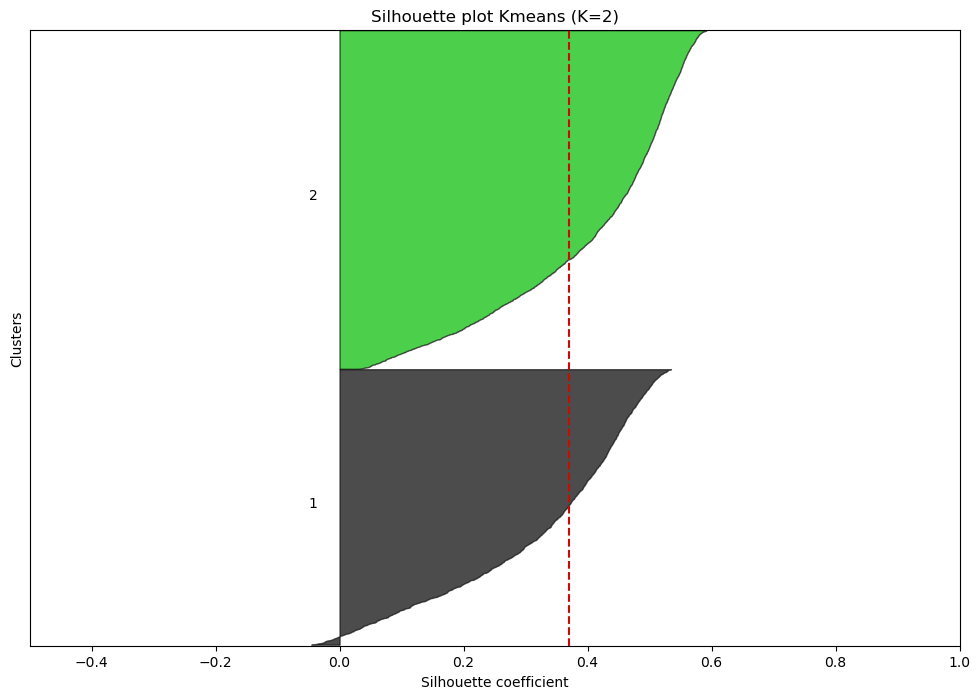

In [51]:
drawSillouette(midnight_noon_standard, kms_midnight_noon.labels_+1, "Kmeans (K=2)")

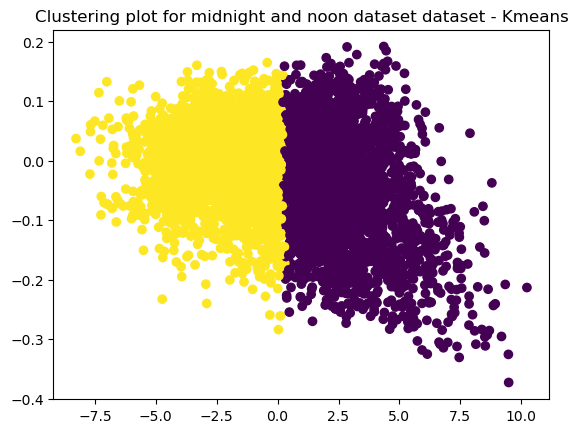

In [50]:
pca_kms_midnight_noon = pca_midnight_noon.copy(deep=True)
kms_labels_filt = np.delete(kms_midnight_noon.labels_, 5307)
pca_kms_midnight_noon['cluster'] = kms_labels_filt

plt.scatter(pca_kms_midnight_noon["PC1"], pca_kms_midnight_noon["PC2"], c=pca_kms_midnight_noon['cluster'])
plt.title('Clustering plot for midnight and noon dataset dataset - Kmeans')
plt.show()

**HAC**

In [610]:
hac_midnight_noon = AgglomerativeClustering(linkage="ward", n_clusters=2).fit(midnight_noon_standard)

In [611]:
nclusts=len(set(hac_midnight_noon.labels_))
cluster_elements_count = np.bincount(hac_midnight_noon.labels_)
for i in range(nclusts):
    print("Cluster: ", i +1, "-->", cluster_elements_count[i], "data points")

Cluster:  1 --> 1734 data points
Cluster:  2 --> 4107 data points


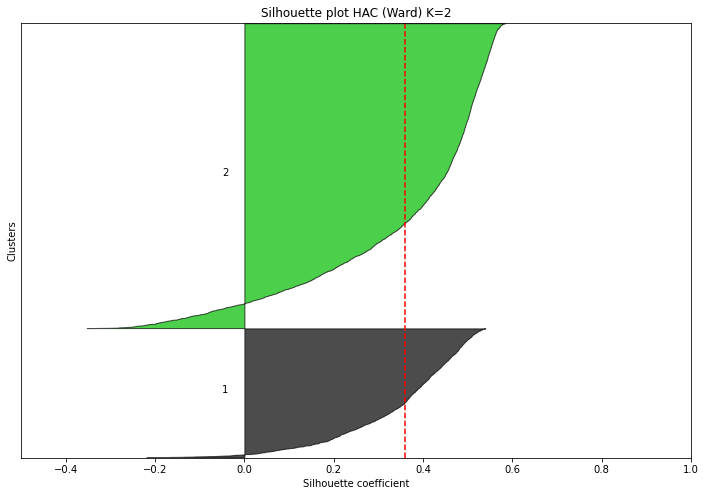

In [612]:
drawSillouette(midnight_noon_standard, hac_midnight_noon.labels_+1, "HAC (Ward) K=2")

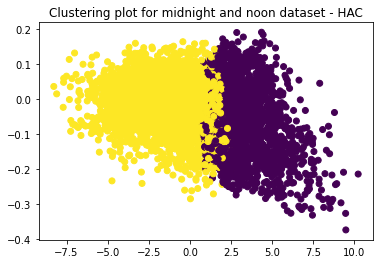

In [613]:
pca_hac_midnight_noon = pca_midnight_noon.copy(deep=True)
hac_labels_filt = np.delete(hac_midnight_noon.labels_, 5307)
pca_hac_midnight_noon['cluster'] = hac_labels_filt

plt.scatter(pca_hac_midnight_noon["PC1"], pca_hac_midnight_noon["PC2"], c=pca_hac_midnight_noon['cluster'])
plt.title('Clustering plot for midnight and noon dataset - HAC')
plt.show()

**DBSCAN**

In [586]:
dbs_midnight_noon = DBSCAN(eps=1.1, min_samples=4).fit(midnight_noon_standard)

In [587]:
nclusts=len(set(dbs_midnight_noon.labels_))
cluster_elements_count = np.bincount(dbs_midnight_noon.labels_+1)
for i in range(nclusts):
    print("Cluster: ", i, "-->", cluster_elements_count[i], "data points")    

Cluster:  0 --> 46 data points
Cluster:  1 --> 5789 data points
Cluster:  2 --> 6 data points


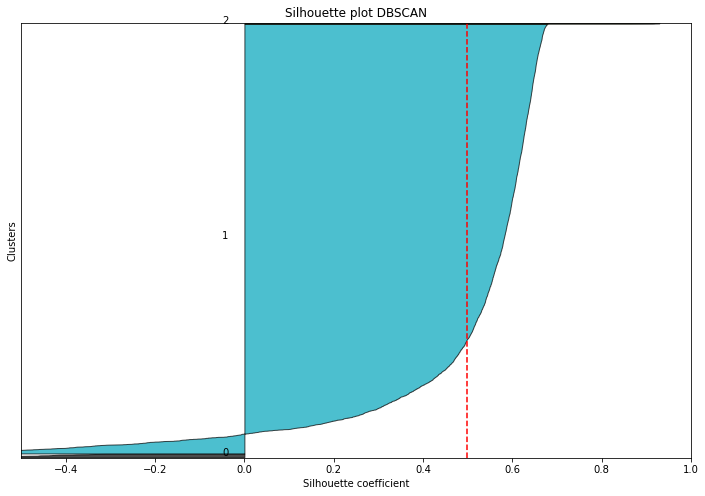

In [590]:
drawSillouette(midnight_noon_standard, dbs_midnight_noon.labels_+1, "DBSCAN")

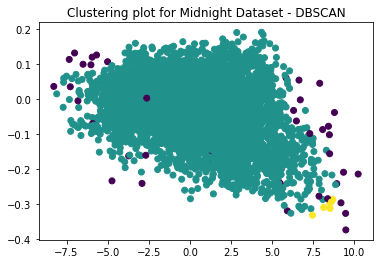

In [593]:
pca_dbs_midnight_noon = pca_midnight_noon.copy(deep=True)
dbs_labels_filt = np.delete(dbs_midnight_noon.labels_, 5307)
pca_dbs_midnight_noon['cluster'] = dbs_labels_filt +1

plt.scatter(pca_dbs_midnight_noon["PC1"], pca_dbs_midnight_noon["PC2"], c=pca_dbs_midnight_noon['cluster'])
plt.title('Clustering plot for midnight and noon dataset - DBSCAN')
plt.show()

**DBSCAN**

## Objective 2 - Cluster all the data

#### 2.1. The Elbow Method

**Kmeans**

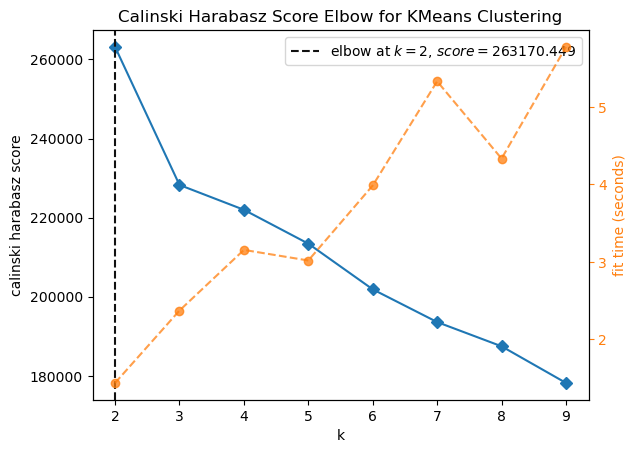

In [52]:
elbow_knee(data_standard, KMeans(), 10)


#### 2.2. Finding the best algorithms for clustering

**Kmeans**

In [621]:
all_data_cluster_kmeans = cluster_analysis_kmeans(data_standard, 10)
all_data_cluster_kmeans.sort_values(['Calinski Harabasz Score'],ascending=False).head(10)

,Number of Clusters,Algorithm,Hyperparameters,Silhouette Score,Calinski Harabasz Score
0,2,Kmeans,-,0.372712,263170.326819
1,3,Kmeans,-,0.373197,228270.908480
2,4,Kmeans,-,0.267142,221991.843016
3,5,Kmeans,-,0.240217,213426.769783
4,6,Kmeans,-,0.241211,201879.760275
5,7,Kmeans,-,0.227852,193604.443868
6,8,Kmeans,-,0.223864,187477.171991
7,9,Kmeans,-,0.224071,178220.926216


**DBSCAN**

In [22]:
#all_data_cluster_dbs = cluster_analysis_dbs(data_standard)

results_dbs = []
for eps in [0.6, 0.8, 1.1, 1.3]:
    for Nmin in [5, 7, 10]:        
        dbs = DBSCAN(eps=eps, min_samples=Nmin).fit(data_standard)
        # We take into account the 'noise' cluster (in DBSCAN it's the first cluster created with id -1),
        # and we are only interested in results with more than 1 'real' cluster
        unique_labels = len(np.unique(list(filter(lambda x: x>-1, dbs.labels_))))
        # We want the cases where 2 or more 'real' clusters were found
        if unique_labels > 1:
            dbs_cscore = calinski_harabasz_score(data_standard, dbs.labels_)
            dbs_sscore = silhouette_score(data_standard, dbs.labels_ + 1)
            result_dbs = {'Number of Clusters': unique_labels, 'Algorithm': 'DBSCAN',
                            'Hyperparameters': f'eps={eps}, min_samples={Nmin}', 'Silhouette Score': dbs_sscore,
                            'Calinski Harabasz Score': dbs_cscore}
            results_dbs.append(result_dbs)

all_data_cluster_dbs = pd.DataFrame(data=results_dbs)

all_data_cluster_dbs.sort_values(['Calinski Harabasz Score'],ascending=False).head(10)

#### 2.3. Clustering the dataset with the chosen algorithms

**Kmeans**

In [17]:
kms_all_data = KMeans(n_clusters=2).fit(data_standard)

In [18]:
nclusts=len(set(kms_all_data.labels_))
cluster_elements_count = np.bincount(kms_all_data.labels_)
for i in range(nclusts):
    print("Cluster: ", i +1, "-->", cluster_elements_count[i], "data points")

Cluster:  1 --> 234287 data points
Cluster:  2 --> 186264 data points


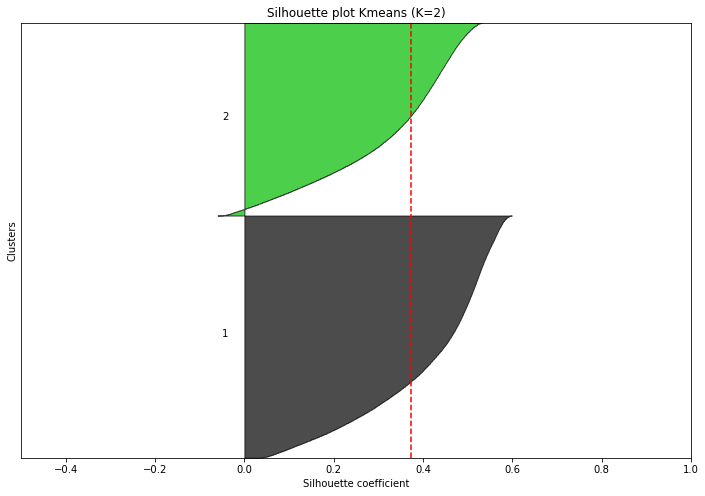

In [19]:
drawSillouette(data_standard, kms_all_data.labels_+1, "Kmeans (K=2)")

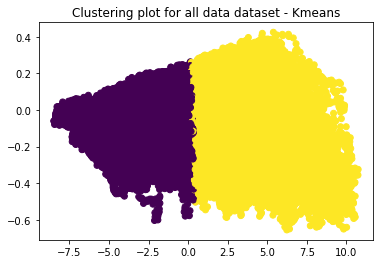

In [32]:
pca_kms_all_data = pca_all_data.copy(deep=True)
kms_labels_filt = np.delete(kms_all_data.labels_, [343577,343578,343579,343580,343581,343582,343583,343584,343585,343586,343587,	
                                343588,343589,343590,343591,343592,343593,343594,343595,343596])
pca_kms_all_data['cluster'] = kms_labels_filt

plt.scatter(pca_kms_all_data["PC1"], pca_kms_all_data["PC2"], c=pca_kms_all_data['cluster'])
plt.title('Clustering plot for all data dataset - Kmeans')
plt.show()

**DBSCAN**

In [17]:
dbs_all_data = DBSCAN(eps=1.1, min_samples=4, n_jobs=-1).fit(data_standard)

In [ ]:
nclusts=len(set(dbs_all_data.labels_))
cluster_elements_count = np.bincount(dbs_all_data.labels_+1)
for i in range(nclusts):
    print("Cluster: ", i, "-->", cluster_elements_count[i], "data points")  

In [ ]:
drawSillouette(data_standard, dbs_all_data.labels_+1, "DBSCAN")

In [ ]:
pca_dbs_all_data = pca_all_data.copy(deep=True)
dbs_labels_filt = np.delete(dbs_all_data.labels_, [343577,343578,343579,343580,343581,343582,343583,343584,343585,343586,343587,	
                                343588,343589,343590,343591,343592,343593,343594,343595,343596])
pca_dbs_all_data['cluster'] = dbs_labels_filt +1

plt.scatter(pca_dbs_all_data["PC1"], pca_dbs_all_data["PC2"], c=pca_dbs_all_data['cluster'])
plt.title('Clustering plot for all data dataset - DBSCAN')
plt.show()